In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
x_min = y_min = -2
x_max = y_max = 2
learning_rate = 0.05
num_epochs = 10000

In [13]:
def plot1d(d1, d2):
    min_x = min(min(d1),min(d2))
    max_x = max(max(d1),max(d2))
    bound_x = (max_x - min_x) / 5
    plt.xlim(min_x-bound_x, max_x+bound_x)
    plt.ylim(min_x-bound_x, max_x+bound_x)
    plt.scatter(d1, [0]*len(d1), c='b', marker='.', s=5)
    plt.scatter(d2, [0]*len(d2), c='r', marker='.', s=5)
    plt.show()
    
def plot2d(d1, d2):
    min_x = min(min(d1[0]),min(d2[0]))
    max_x = max(max(d1[0]),max(d2[0]))
    bound_x = (max_x - min_x) / 5
    min_y = min(min(d1[1]),min(d2[1]))
    max_y = max(max(d1[1]),max(d2[1]))
    bound_y = (max_y - min_y) / 5
    plt.xlim(min_x-bound_x, max_x+bound_x)
    plt.ylim(min_y-bound_y, max_y+bound_y)
    plt.scatter(d1[0], d1[1], c='b', marker='.', s=5)
    plt.scatter(d2[0], d2[1], c='r', marker='.', s=5)
    plt.show()

In [4]:
x_a = np.mgrid[-1:1:0.01].reshape(-1)
x_b = np.concatenate((np.mgrid[-3:-2:0.01].reshape(-1), np.mgrid[2:3:0.01].reshape(-1)), axis=0)
x_labels = np.concatenate((x_a, x_b), axis=0)
np.random.shuffle(x_labels)
y_labels = np.asarray(map(lambda x: [1,0] if x < 1 and x >= -1 else [0,1], x_labels))

In [5]:
def model(X):
    X_1 = tf.expand_dims(X, 0)
    W_1 = tf.Variable(tf.random_normal([2,1])) # [[3.0],[1.0]]
    B_1 = tf.Variable(tf.random_normal([2,1]))
    L_1 = tf.add(tf.matmul(W_1, X_1), B_1)
    X_2 = tf.sigmoid(L_1)
    W_2 = tf.Variable(tf.random_normal([2,2])) # [[3.0],[1.0]]
    B_2 = tf.Variable(tf.random_normal([2,1]))
    L_2 = tf.add(tf.matmul(W_2, X_2), B_2)
    Y = tf.transpose(L_2)
    return X_1, L_1, X_2, L_2, Y

In [6]:
def predict(Y):
    a = Y[0]
    b = Y[1]
    if a > b:
        return 'blue'
    else:
        return 'red'

In [7]:
def train(graph, sess):
    with graph.as_default():
        X = tf.placeholder('float')
        Y_labels = tf.placeholder('float')
        X_1, L_1, X_2, L_2, Y = model(X)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_labels, logits=Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        with sess.as_default():
            sess.run(tf.global_variables_initializer())
            feed_dict = {X: x_labels, Y_labels: y_labels}
            for i in range(num_epochs):
                _, loss = sess.run([optimizer, cost], feed_dict=feed_dict)
                if i % 1000 == 0:
                    print 'Loss: {}'.format(loss)
                    y_a = sess.run(Y, feed_dict={X: x_a})
                    y_b = sess.run(Y, feed_dict={X: x_b})
                    plot2d(y_a.T, y_b.T)
            return X, L_1, X_2, L_2, Y

Loss: 0.905274808407


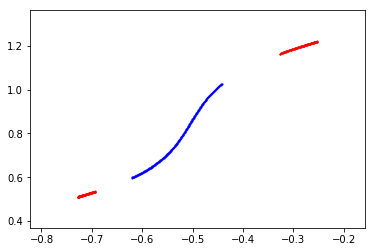

Loss: 0.619085609913


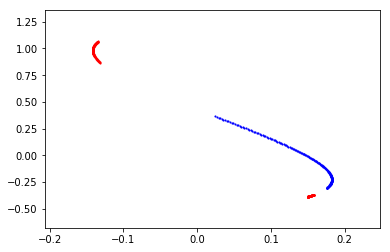

Loss: 0.533021569252


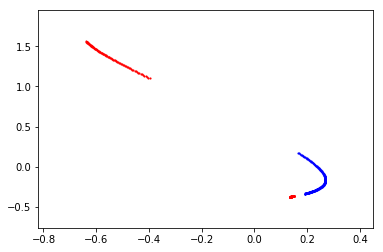

Loss: 0.308309882879


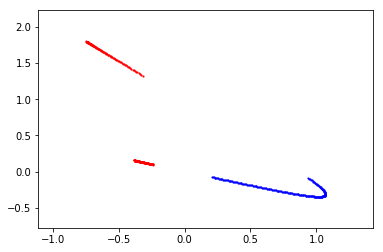

Loss: 0.0987442210317


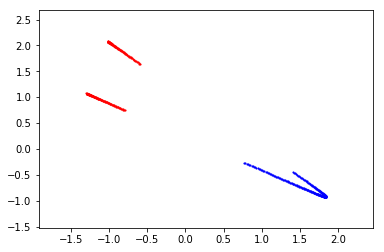

Loss: 0.0537431649864


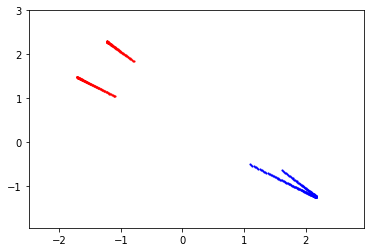

Loss: 0.0363325290382


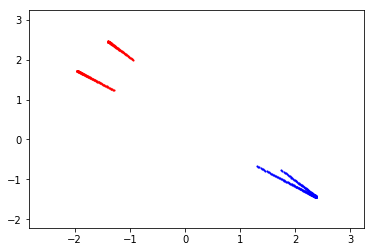

Loss: 0.0272595621645


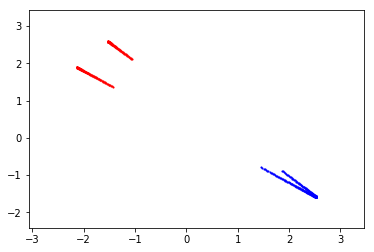

Loss: 0.0217338036746


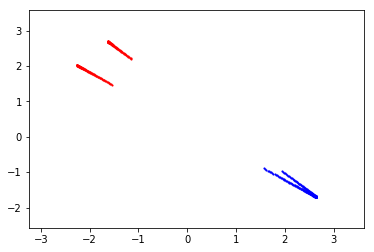

Loss: 0.0180306117982


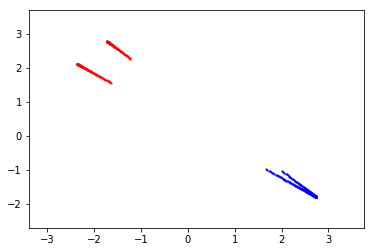

In [14]:
graph = tf.Graph()
sess = tf.Session(graph=graph)
X, L_1, X_2, L_2, Y = train(graph, sess)

In [15]:
with graph.as_default():
    with sess.as_default():
        l_1_a, x_2_a, l_2_a, y_a = sess.run([L_1, X_2, L_2, Y], feed_dict={X: x_a})
        l_1_b, x_2_b, l_2_b, y_b = sess.run([L_1, X_2, L_2, Y], feed_dict={X: x_b})

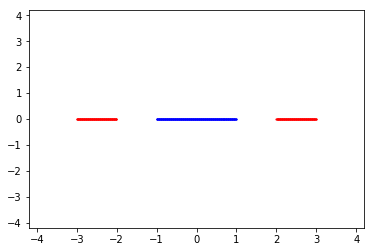

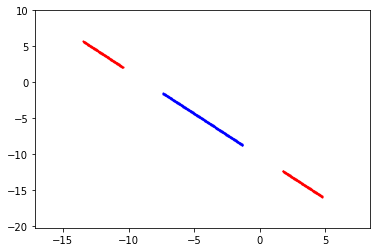

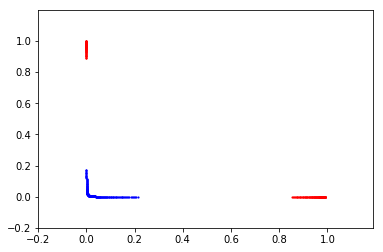

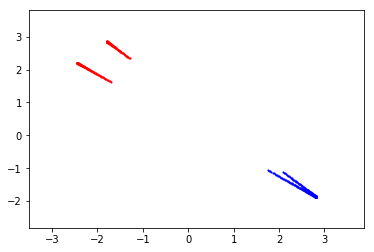

In [16]:
plot1d(x_a, x_b)
plot2d(l_1_a, l_1_b)
plot2d(x_2_a, x_2_b)
plot2d(l_2_a, l_2_b)

In [ ]:
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.scatter(x_a, [0]*len(x_a))
plt.scatter(x_b, [0]*len(x_b), c='r')
plt.show()

plt.xlim(x_min*5,x_max*5)
plt.ylim(y_min*5,y_max*5)
plt.scatter(y_a.T[0], y_a.T[1])
plt.scatter(y_b.T[0], y_b.T[1], c='r')
plt.show()

In [ ]:
feed_dict = {X: x_a}

l_1_a = sess.run(L_1, feed_dict=feed_dict)
x_2_a = sess.run(X_2, feed_dict=feed_dict)
y_a = sess.run(Y, feed_dict=feed_dict)[0]

feed_dict[X] = x_b

l_1_b = sess.run(L_1, feed_dict=feed_dict)
x_2_b = sess.run(X_2, feed_dict=feed_dict)
y_b = sess.run(Y, feed_dict=feed_dict)[0]

In [ ]:
plt.xlim(x_min*3,x_max*3)
plt.ylim(y_min*3,y_max*3)
plt.scatter(l_1_a[0], l_1_a[1])
plt.scatter(l_1_b[0], l_1_b[1], c='r')
plt.show()

In [ ]:
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.scatter(x_2_a[0], x_2_a[1])
plt.scatter(x_2_b[0], x_2_b[1], c='r')
plt.show()

In [ ]:
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.scatter(y_a, [0]*len(y_a))
plt.scatter(y_b, [0]*len(y_b), c='r')
plt.show()